

*   Emmanuel Marín López
*   Juan Fernando Patino Castaño
*   Angie Vanessa Vaquiro Barajas


In [ ]:
#Seleccionar un problema e identificar un objetivo

"""
Una pelicula comercial por lo general entretiene al publico y genera grandes
ingresos en taquillas para las compañias cinematograficas. Hay diferentes
factores que garantizan el éxito, por ejemplo, grandes directores y actores.
Sin embargo, ha sucedido que peliculas con grandes actores y directores no han
tenido el éxito esperado en cuanto a taquilla y calificación IMDB.

Basandonos en una base de datos con diferente información relacionada a peliculas
queremos comprender los factores más importantes que determinan el éxito de una
pelicula.Por lo tant, analizaremos que genero de peliculas es mas exitosos,
en pocas palabras cuales tienen la calificación IMDB más alta.

IMDB_Score    Calificación
1-3           Mala
3-6           Aceptable
6-8           Buena
8-10          Muy buena

"""

'\nUna pelicula comercial por lo general entretiene al publico y genera grandes\ningresos en taquillas para las compañias cinematograficas. Hay diferentes\nfactores que garantizan el éxito, por ejemplo, grandes directores y actores.\nSin embargo, ha sucedido que peliculas con grandes actores y directores no han\ntenido el éxito esperado en cuanto a taquilla y calificación IMDB.\n\nBasandonos en una base de datos con diferente información relacionada a peliculas\nqueremos comprender los factores más importantes que determinan el éxito de una\npelicula.Por lo tant, analizaremos que genero de peliculas es mas exitosos,\nen pocas palabras cuales tienen la calificación IMDB más alta.\n\nIMDB_Score    Calificación\n1-3           Mala\n3-6           Aceptable\n6-8           Buena\n8-10          Muy buena\n\n'

In [ ]:
import matplotlib as mp
import pandas as pd
import seaborn as sb
import sklearn as sk
import numpy as np
import sklearn.linear_model as lm
import sklearn.model_selection as ms
import sklearn.preprocessing as pp
import sklearn.pipeline as pl
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Cargar el dataset
dataset = pd.read_csv('/content/movie_metadata.csv')
dataset.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0$,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0$,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0$,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0$,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,0.0$,NaN,12.0,7.1,NaN,0


In [ ]:
dataset.columns

Index(['color', 'director_name', 'num_critic_for_reviews', 'duration',
       'director_facebook_likes', 'actor_3_facebook_likes', 'actor_2_name',
       'actor_1_facebook_likes', 'gross', 'genres', 'actor_1_name',
       'movie_title', 'num_voted_users', 'cast_total_facebook_likes',
       'actor_3_name', 'facenumber_in_poster', 'plot_keywords',
       'movie_imdb_link', 'num_user_for_reviews', 'language', 'country',
       'content_rating', 'budget', 'title_year', 'actor_2_facebook_likes',
       'imdb_score', 'aspect_ratio', 'movie_facebook_likes'],
      dtype='object')

In [ ]:
#Estructura del dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [ ]:
dataset.describe()

,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,2016.000000,137000.000000,9.500000,16.000000,349000.000000


In [ ]:
dataset.shape

(5043, 28)

In [ ]:
#Tratamiento de datos duplicados
dataset.duplicated().sum()

45

In [ ]:
#Elimianar datos duplicados
dataset.drop_duplicates(inplace = True)
dataset.duplicated().sum()

0

In [ ]:
dataset.shape

(4998, 28)

In [ ]:
#Tratamiento de los datos faltantes
dataset.isnull().sum()

,0
color,19
director_name,103
num_critic_for_reviews,49
duration,15
director_facebook_likes,103
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,874
genres,0


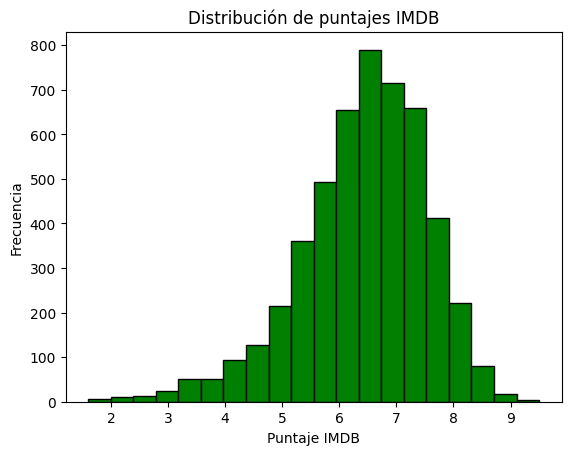

In [ ]:
# Visualizacion de variables
# Histograma

plt.hist(dataset['imdb_score'], bins = 20, edgecolor = 'black', color = 'green')
plt.title('Distribución de puntajes IMDB')
plt.xlabel('Puntaje IMDB')
plt.ylabel('Frecuencia')
plt.show()

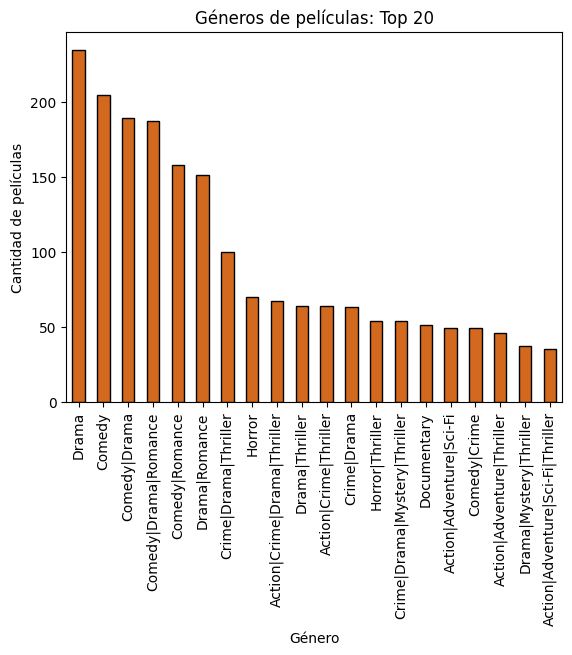

In [ ]:
#Grafico de barras
dataset['genres'].value_counts().head(20).plot(kind = "bar", edgecolor = "black", color = "chocolate")
plt.title("Géneros de películas: Top 20")
plt.xlabel('Género')
plt.ylabel('Cantidad de películas')
plt.show()


In [ ]:
#Análisis de correlaciones
dataset["budget"] = dataset["budget"].str.replace("$", '', regex = False)
dataset_mean = dataset.copy ()
dataset_mean["budget"].isnull().sum()

0

In [ ]:
correlation = dataset[["budget", "gross", "imdb_score"]].corr()
correlation

,budget,gross,imdb_score
budget,1.000000,0.106943,0.026164
gross,0.106943,1.000000,0.198417
imdb_score,0.026164,0.198417,1.000000


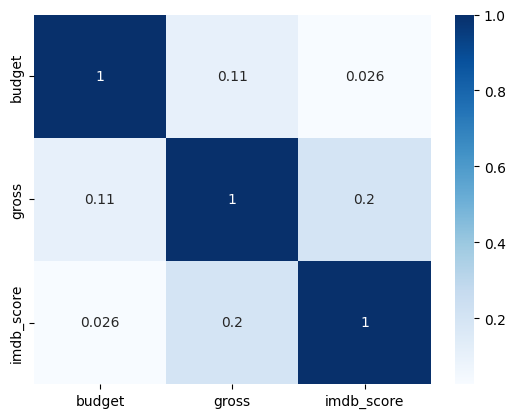

In [ ]:
#mapa de calor
mapacalor = sns.heatmap(correlation, annot = True, cmap = "Blues")
plt.show()

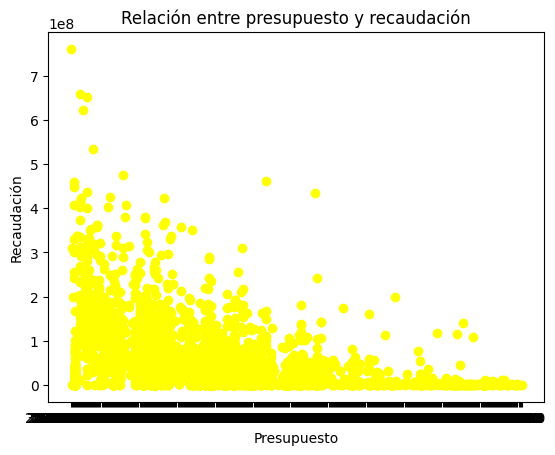

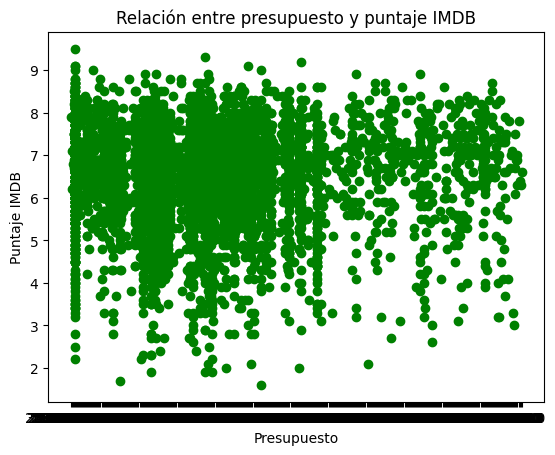

In [ ]:
# Gráficos de dispersión
dispersion = plt.scatter(dataset["budget"], dataset["gross"], c = "yellow")
plt.xlabel("Presupuesto")
plt.ylabel("Recaudación")
plt.title("Relación entre presupuesto y recaudación")
plt.show()
dispersion = plt.scatter(dataset["budget"], dataset["imdb_score"], c = "green")
plt.xlabel("Presupuesto")
plt.ylabel("Puntaje IMDB")
plt.title("Relación entre presupuesto y puntaje IMDB")
plt.show()

In [ ]:
dataset.to_csv('dataset_clean.csv', index = False, encoding = "utf-8")

In [ ]:
dataset = pd.read_csv('/content/dataset_clean.csv')

In [ ]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4998 entries, 0 to 4997
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      4979 non-null   object 
 1   director_name              4895 non-null   object 
 2   num_critic_for_reviews     4949 non-null   float64
 3   duration                   4983 non-null   float64
 4   director_facebook_likes    4895 non-null   float64
 5   actor_3_facebook_likes     4975 non-null   float64
 6   actor_2_name               4985 non-null   object 
 7   actor_1_facebook_likes     4991 non-null   float64
 8   gross                      4124 non-null   float64
 9   genres                     4998 non-null   object 
 10  actor_1_name               4991 non-null   object 
 11  movie_title                4998 non-null   object 
 12  num_voted_users            4998 non-null   int64  
 13  cast_total_facebook_likes  4998 non-null   int64

In [ ]:
dataset.isnull().sum()

,0
color,19
director_name,103
num_critic_for_reviews,49
duration,15
director_facebook_likes,103
actor_3_facebook_likes,23
actor_2_name,13
actor_1_facebook_likes,7
gross,874
genres,0


In [ ]:
dataset = dataset.dropna()
dataset.isnull().sum()

,0
color,0
director_name,0
num_critic_for_reviews,0
duration,0
director_facebook_likes,0
actor_3_facebook_likes,0
actor_2_name,0
actor_1_facebook_likes,0
gross,0
genres,0


**CONCLUSIONES**


*   La mayoría de las películas tienen un puntaje IMDB entre 6 y 7.
*   Hay pocas películas con puntajes IMDB muy bajos (1-3) o muy altos (8-10).
*   Los géneros de películas más comunes son Drama, Comedia y Thriller.
*   Los géneros de películas menos comunes son Western, Musical y Bélico.
*   Existe una correlación positiva entre el presupuesto y la recaudación de una película. Esto significa que las películas con mayor presupuesto tienden a tener mayor recaudación.
*   Existe una correlación débil entre el presupuesto y el puntaje IMDB de una película. Esto significa que las películas con mayor presupuesto no necesariamente tienen mejor puntaje IMDB.

El puntaje IMDB de una película está influenciado por una variedad de factores, incluyendo el género, el presupuesto y la recaudación.
El género de película más popular es Drama, seguido de Comedia y Thriller.
Las películas con mayor presupuesto tienden a tener mayor recaudación, pero no necesariamente mejor puntaje IMDB.